In [11]:
import string
from collections import defaultdict

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))
from wordcloud import STOPWORDS

import warnings

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/javier/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Index

1. [Importing Data](#data)
2. [Data Analysis](#data-analysis)
   1. [Meta Features](#meta-features)
   2. [Target](#target)
   3. [N-grams](#N-grams)

# Data

All Kaggle dataframes are preprocessed and merged to create a single training set. This is done to improve the performance of the machine learning model by providing more data to train on.

In [12]:
part_paths = [
    '../data/kaggle/sentiment/training.1600000.processed.noemoticon.csv.part1',
    '../data/kaggle/sentiment/training.1600000.processed.noemoticon.csv.part2',
    '../data/kaggle/sentiment/training.1600000.processed.noemoticon.csv.part3',
    '../data/kaggle/sentiment/training.1600000.processed.noemoticon.csv.part4',
    '../data/kaggle/sentiment/training.1600000.processed.noemoticon.csv.part5',
    '../data/kaggle/sentiment/training.1600000.processed.noemoticon.csv.part6',
    '../data/kaggle/sentiment/training.1600000.processed.noemoticon.csv.part7',
    '../data/kaggle/sentiment/training.1600000.processed.noemoticon.csv.part8',
    '../data/kaggle/sentiment/training.1600000.processed.noemoticon.csv.part9',
    '../data/kaggle/sentiment/training.1600000.processed.noemoticon.csv.part10',
    '../data/kaggle/sentiment/training.1600000.processed.noemoticon.csv.part11',
    '../data/kaggle/sentiment/training.1600000.processed.noemoticon.csv.part12',
]

In [13]:
df_list = [pd.read_csv(part_path, encoding='utf-8', lineterminator='\n', on_bad_lines='skip') for part_path in part_paths]
data = pd.concat(df_list, ignore_index=True)

**target:** 
- (0 = negative, 4 = positive)

In [14]:
data 

,target,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [15]:
data.isnull().sum()

target    0
id        0
date      0
query     0
user      0
text      0
dtype: int64

# Data Analysis

## Meta Features

The distributions of meta features can be helpful to identify sentiment on texts.

* **Word count:** The number of words in a tweet.
* **Unique word count:** The number of unique words in a tweet.
* **Stop word count:** The number of stop words in a tweet.
* **URL count:** The number of URLs in a tweet.
* **Mean word length:** The average character count in a word.
* **Character count:** The total number of characters in a tweet.
* **Punctuation count:** The number of punctuation marks in a tweet.

In [16]:
warnings.filterwarnings('ignore')
stats = pd.DataFrame()

# word_count
stats['word_count'] = data['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
stats['unique_word_count'] = data['text'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
stats['stop_word_count'] = data['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# mean_word_length
stats['mean_word_length'] = data['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
stats['char_count'] = data['text'].apply(lambda x: len(str(x)))

# punctuation_count
stats['punctuation_count'] = data['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

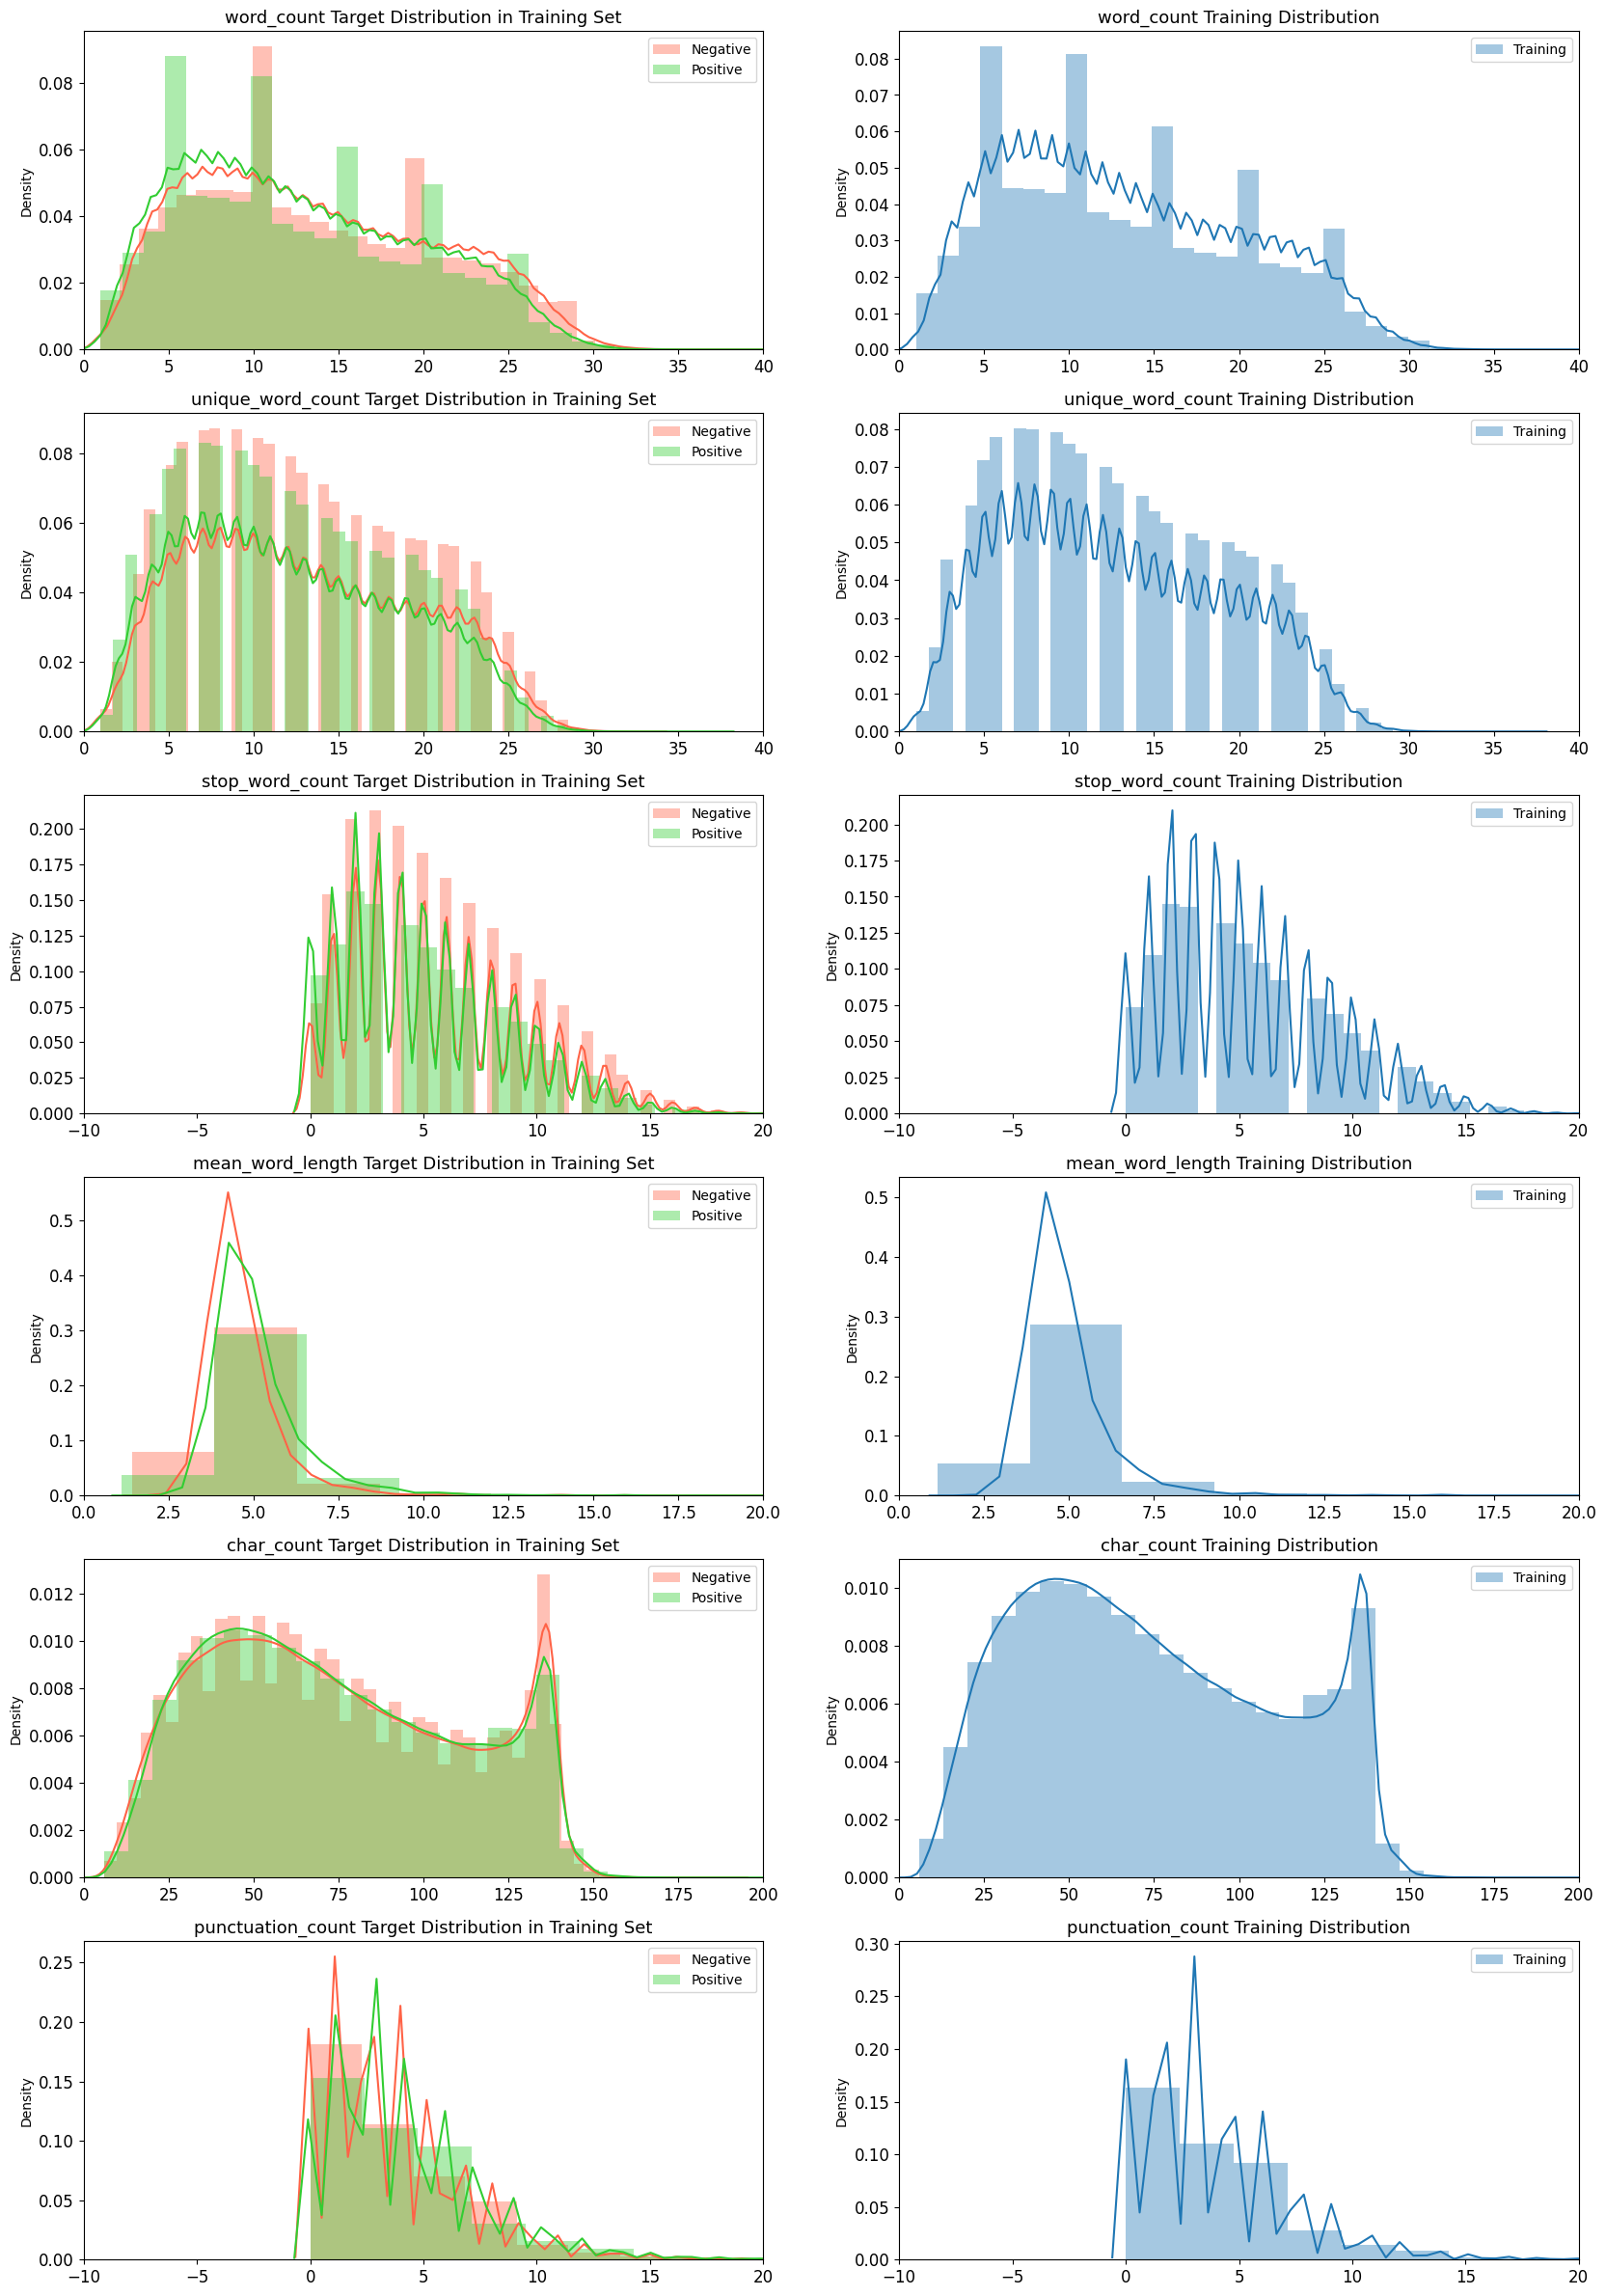

In [48]:
METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'mean_word_length',
                'char_count', 'punctuation_count']

SENTIMENT = data['target'] == 4

fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 30), dpi=100)

for i, feature in enumerate(METAFEATURES):
    sns.distplot(stats.loc[~SENTIMENT][feature], label='Negative', ax=axes[i][0], color='tomato')
    sns.distplot(stats.loc[SENTIMENT][feature], label='Positive', ax=axes[i][0], color='LimeGreen')

    sns.distplot(stats[feature], label='Training', ax=axes[i][1])
    
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[i][1].set_title(f'{feature} Training Distribution', fontsize=13)

    axes[0][0].set_xlim(0, 40)
    axes[0][1].set_xlim(0, 40)

    axes[1][0].set_xlim(0, 40)
    axes[1][1].set_xlim(0, 40)

    axes[2][0].set_xlim(-10, 20)
    axes[2][1].set_xlim(-10, 20)

    axes[3][0].set_xlim(0, 20)
    axes[3][1].set_xlim(0, 20)

    axes[4][0].set_xlim(0, 200)
    axes[4][1].set_xlim(0, 200)

    axes[5][0].set_xlim(-10, 20)
    axes[5][1].set_xlim(-10, 20)

plt.show()

## Target

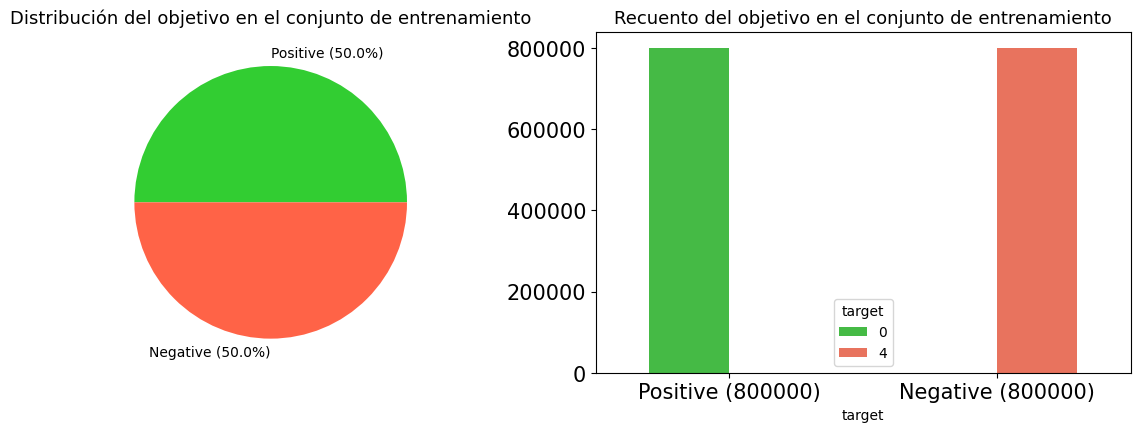

In [51]:
target_count = pd.Series(SENTIMENT).value_counts()
negative = target_count[0]
positive = target_count[1]
negative_perc = round((target_count[0] * 100) / (target_count[0] + target_count[1]), 0)
positive_perc = round((target_count[1] * 100) / (target_count[0] + target_count[1]), 0)

fig, axes = plt.subplots(ncols=2, figsize=(12, 4), dpi=100)
plt.tight_layout()

data.groupby('target').count()['id'].plot(kind='pie', ax=axes[0], labels=[f'Positive ({positive_perc}%)', f'Negative ({negative_perc}%)'],
                                            colors=['LimeGreen', 'tomato']) 

sns.countplot(x=data['target'], hue=data['target'], ax=axes[1], width=0.6, palette=['LimeGreen', 'tomato'])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels([f'Positive ({positive})', f'Negative ({negative})'])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Distribución del objetivo en el conjunto de entrenamiento', fontsize=13)
axes[1].set_title('Recuento del objetivo en el conjunto de entrenamiento', fontsize=13)

plt.show()

## N-grams

An n-gram is a sequence of n words in a text. Unigram is a single word, a bigram is a sequence of two words, a trigram is a sequence of three words, and so on. N-grams are used in natural language processing to identify patterns in language. For example, n-grams can be used to identify words that often appear together, or to identify words that are more likely to appear in a certain context.

In [55]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 50

# Unigrams
positive_unigrams = defaultdict(int)
negative_unigrams = defaultdict(int)

for tweet in data[SENTIMENT]['text']:
    for word in generate_ngrams(tweet):
        positive_unigrams[word] += 1
        
for tweet in data[~SENTIMENT]['text']:
    for word in generate_ngrams(tweet):
        negative_unigrams[word] += 1
        
df_positive_unigrams = pd.DataFrame(sorted(positive_unigrams.items(), key=lambda x: x[1])[::-1])
df_negative_unigrams = pd.DataFrame(sorted(negative_unigrams.items(), key=lambda x: x[1])[::-1])

# Bigrams
positive_bigrams = defaultdict(int)
negative_bigrams = defaultdict(int)

for tweet in data[SENTIMENT]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        positive_bigrams[word] += 1
        
for tweet in data[~SENTIMENT]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        negative_bigrams[word] += 1
        
df_positive_bigrams = pd.DataFrame(sorted(positive_bigrams.items(), key=lambda x: x[1])[::-1])
df_negative_bigrams = pd.DataFrame(sorted(negative_bigrams.items(), key=lambda x: x[1])[::-1])

# Trigrams
positive_trigrams = defaultdict(int)
negative_trigrams = defaultdict(int)

for tweet in data[SENTIMENT]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        positive_trigrams[word] += 1
        
for tweet in data[~SENTIMENT]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        negative_trigrams[word] += 1
        
df_positive_trigrams = pd.DataFrame(sorted(positive_trigrams.items(), key=lambda x: x[1])[::-1])
df_negative_trigrams = pd.DataFrame(sorted(negative_trigrams.items(), key=lambda x: x[1])[::-1])

### Unigrams

poner analisis

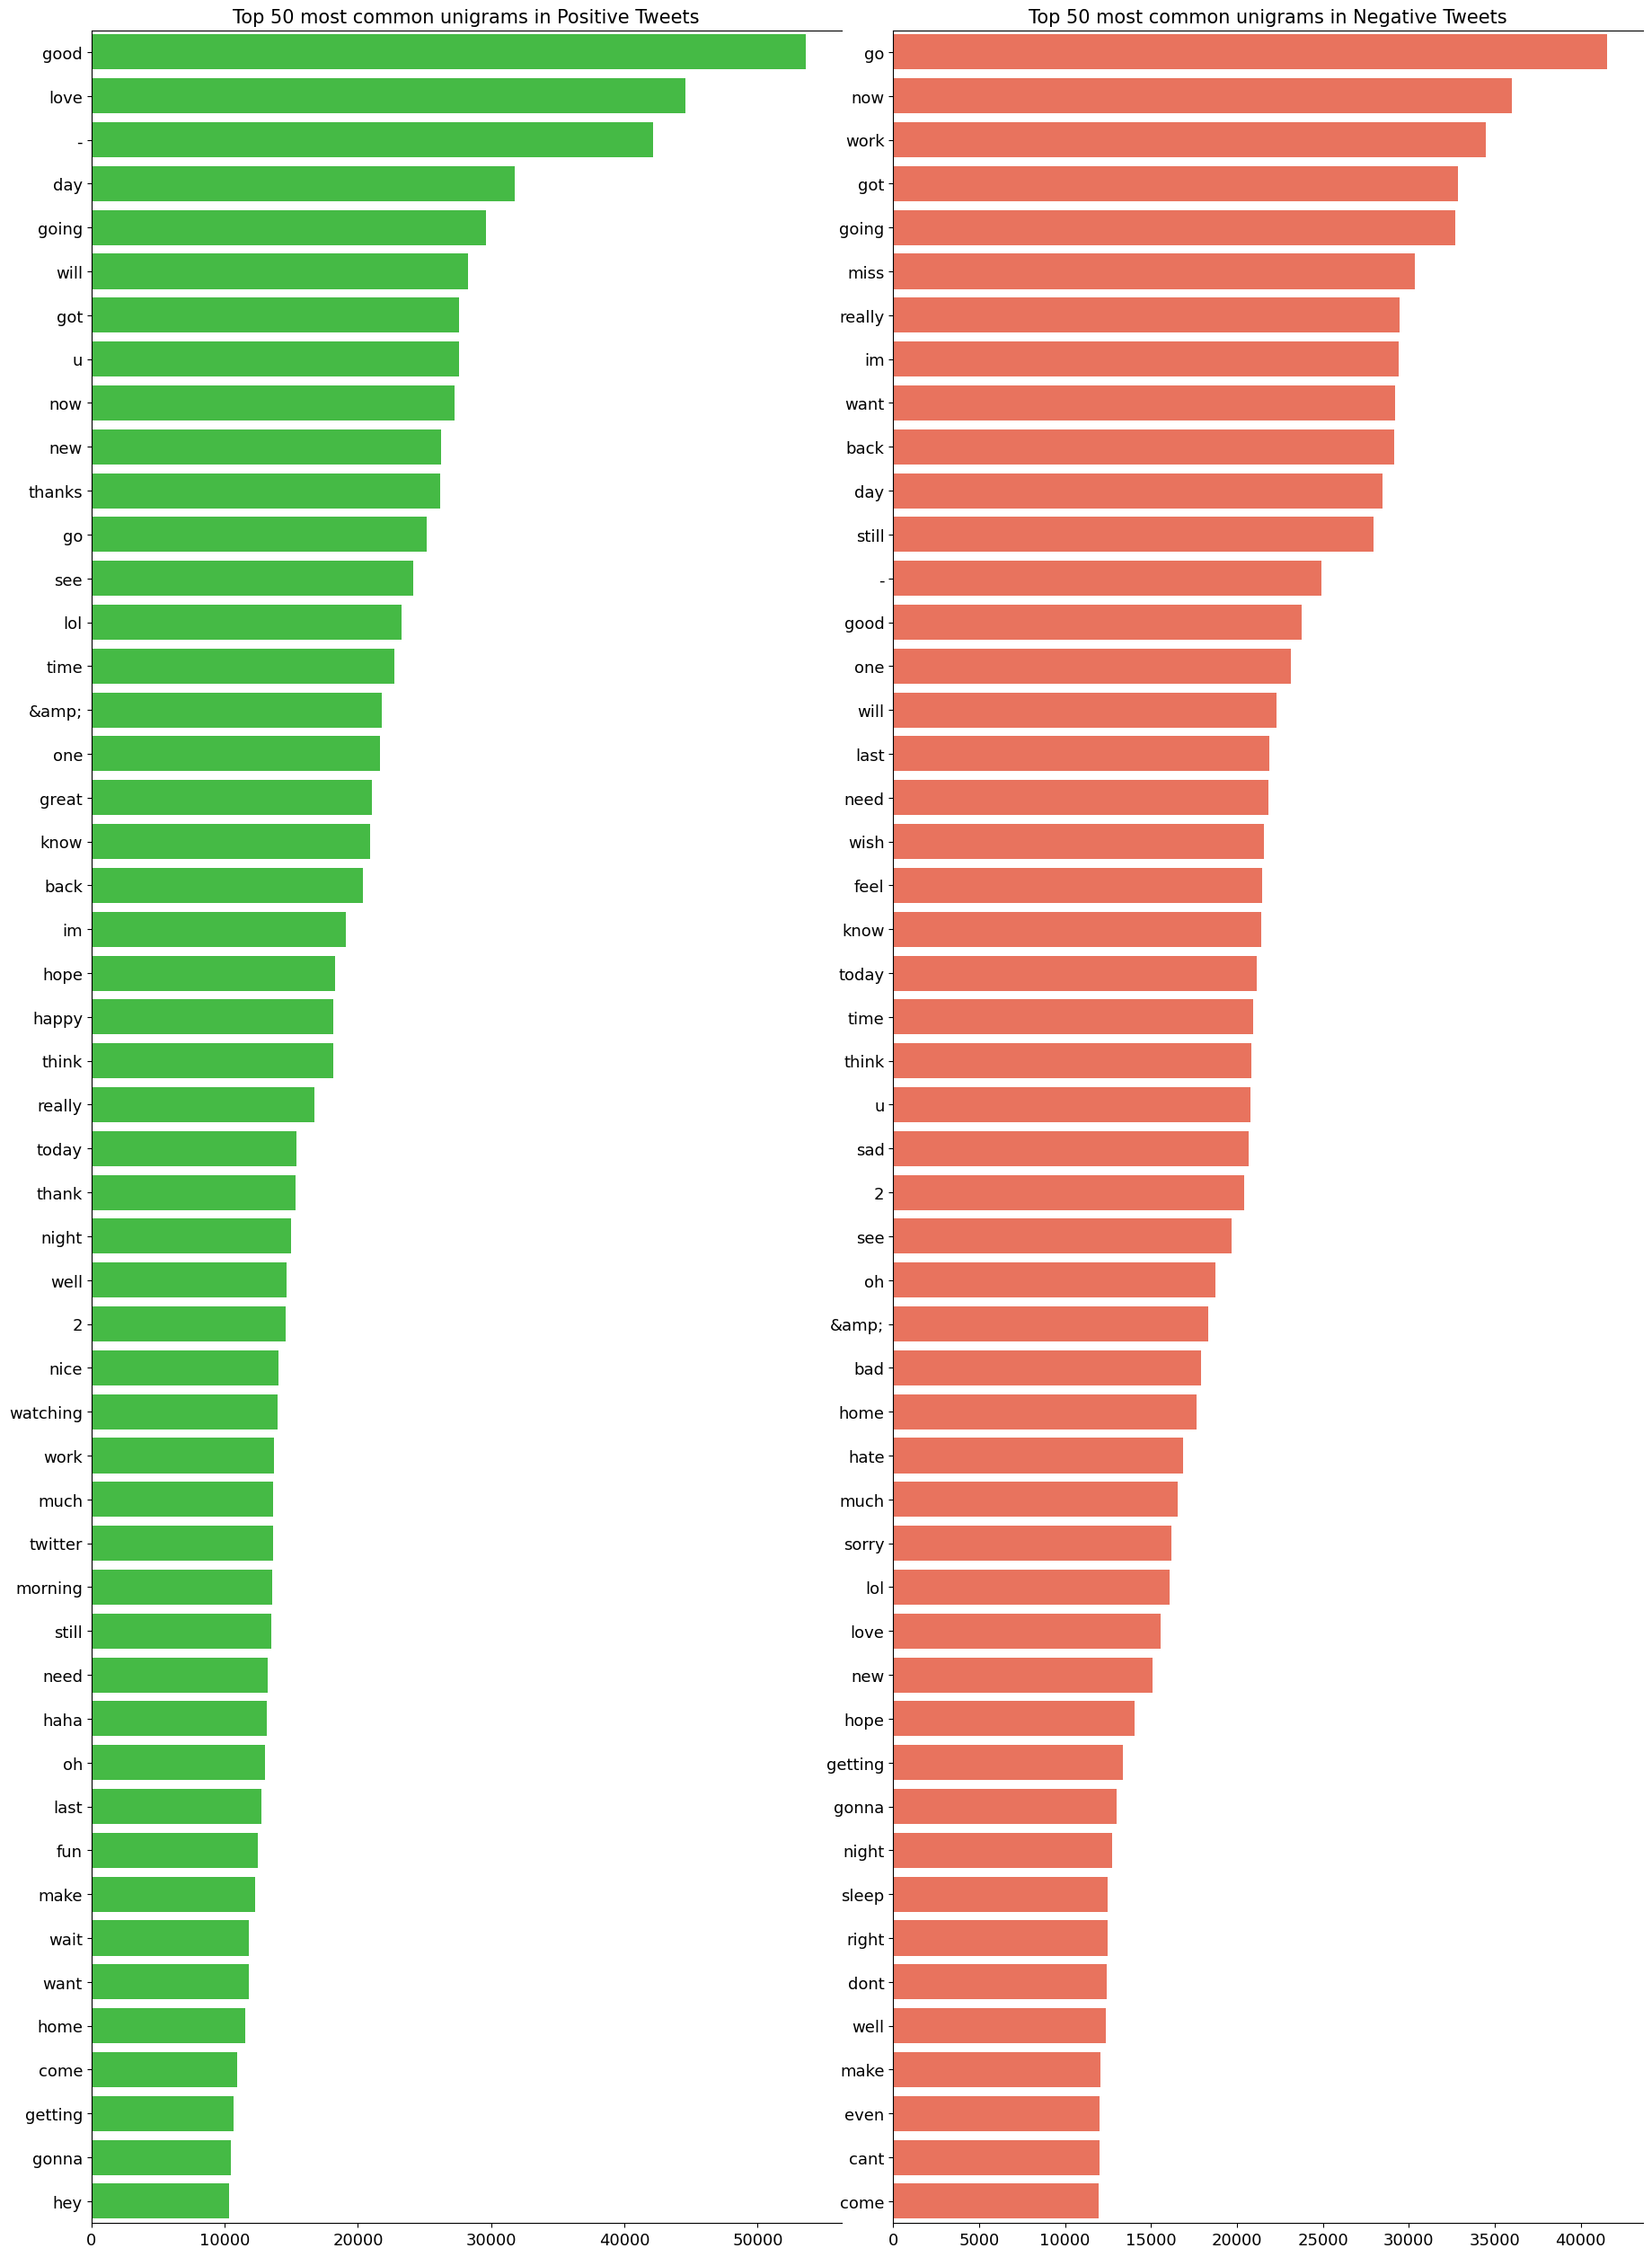

In [57]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 25), dpi=100)
plt.tight_layout()

sns.barplot(y=df_positive_unigrams[0].values[:N], x=df_positive_unigrams[1].values[:N], ax=axes[0], color='LimeGreen')
sns.barplot(y=df_negative_unigrams[0].values[:N], x=df_negative_unigrams[1].values[:N], ax=axes[1], color='tomato')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in Positive Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in Negative Tweets', fontsize=15)

plt.show()

### Bigrams

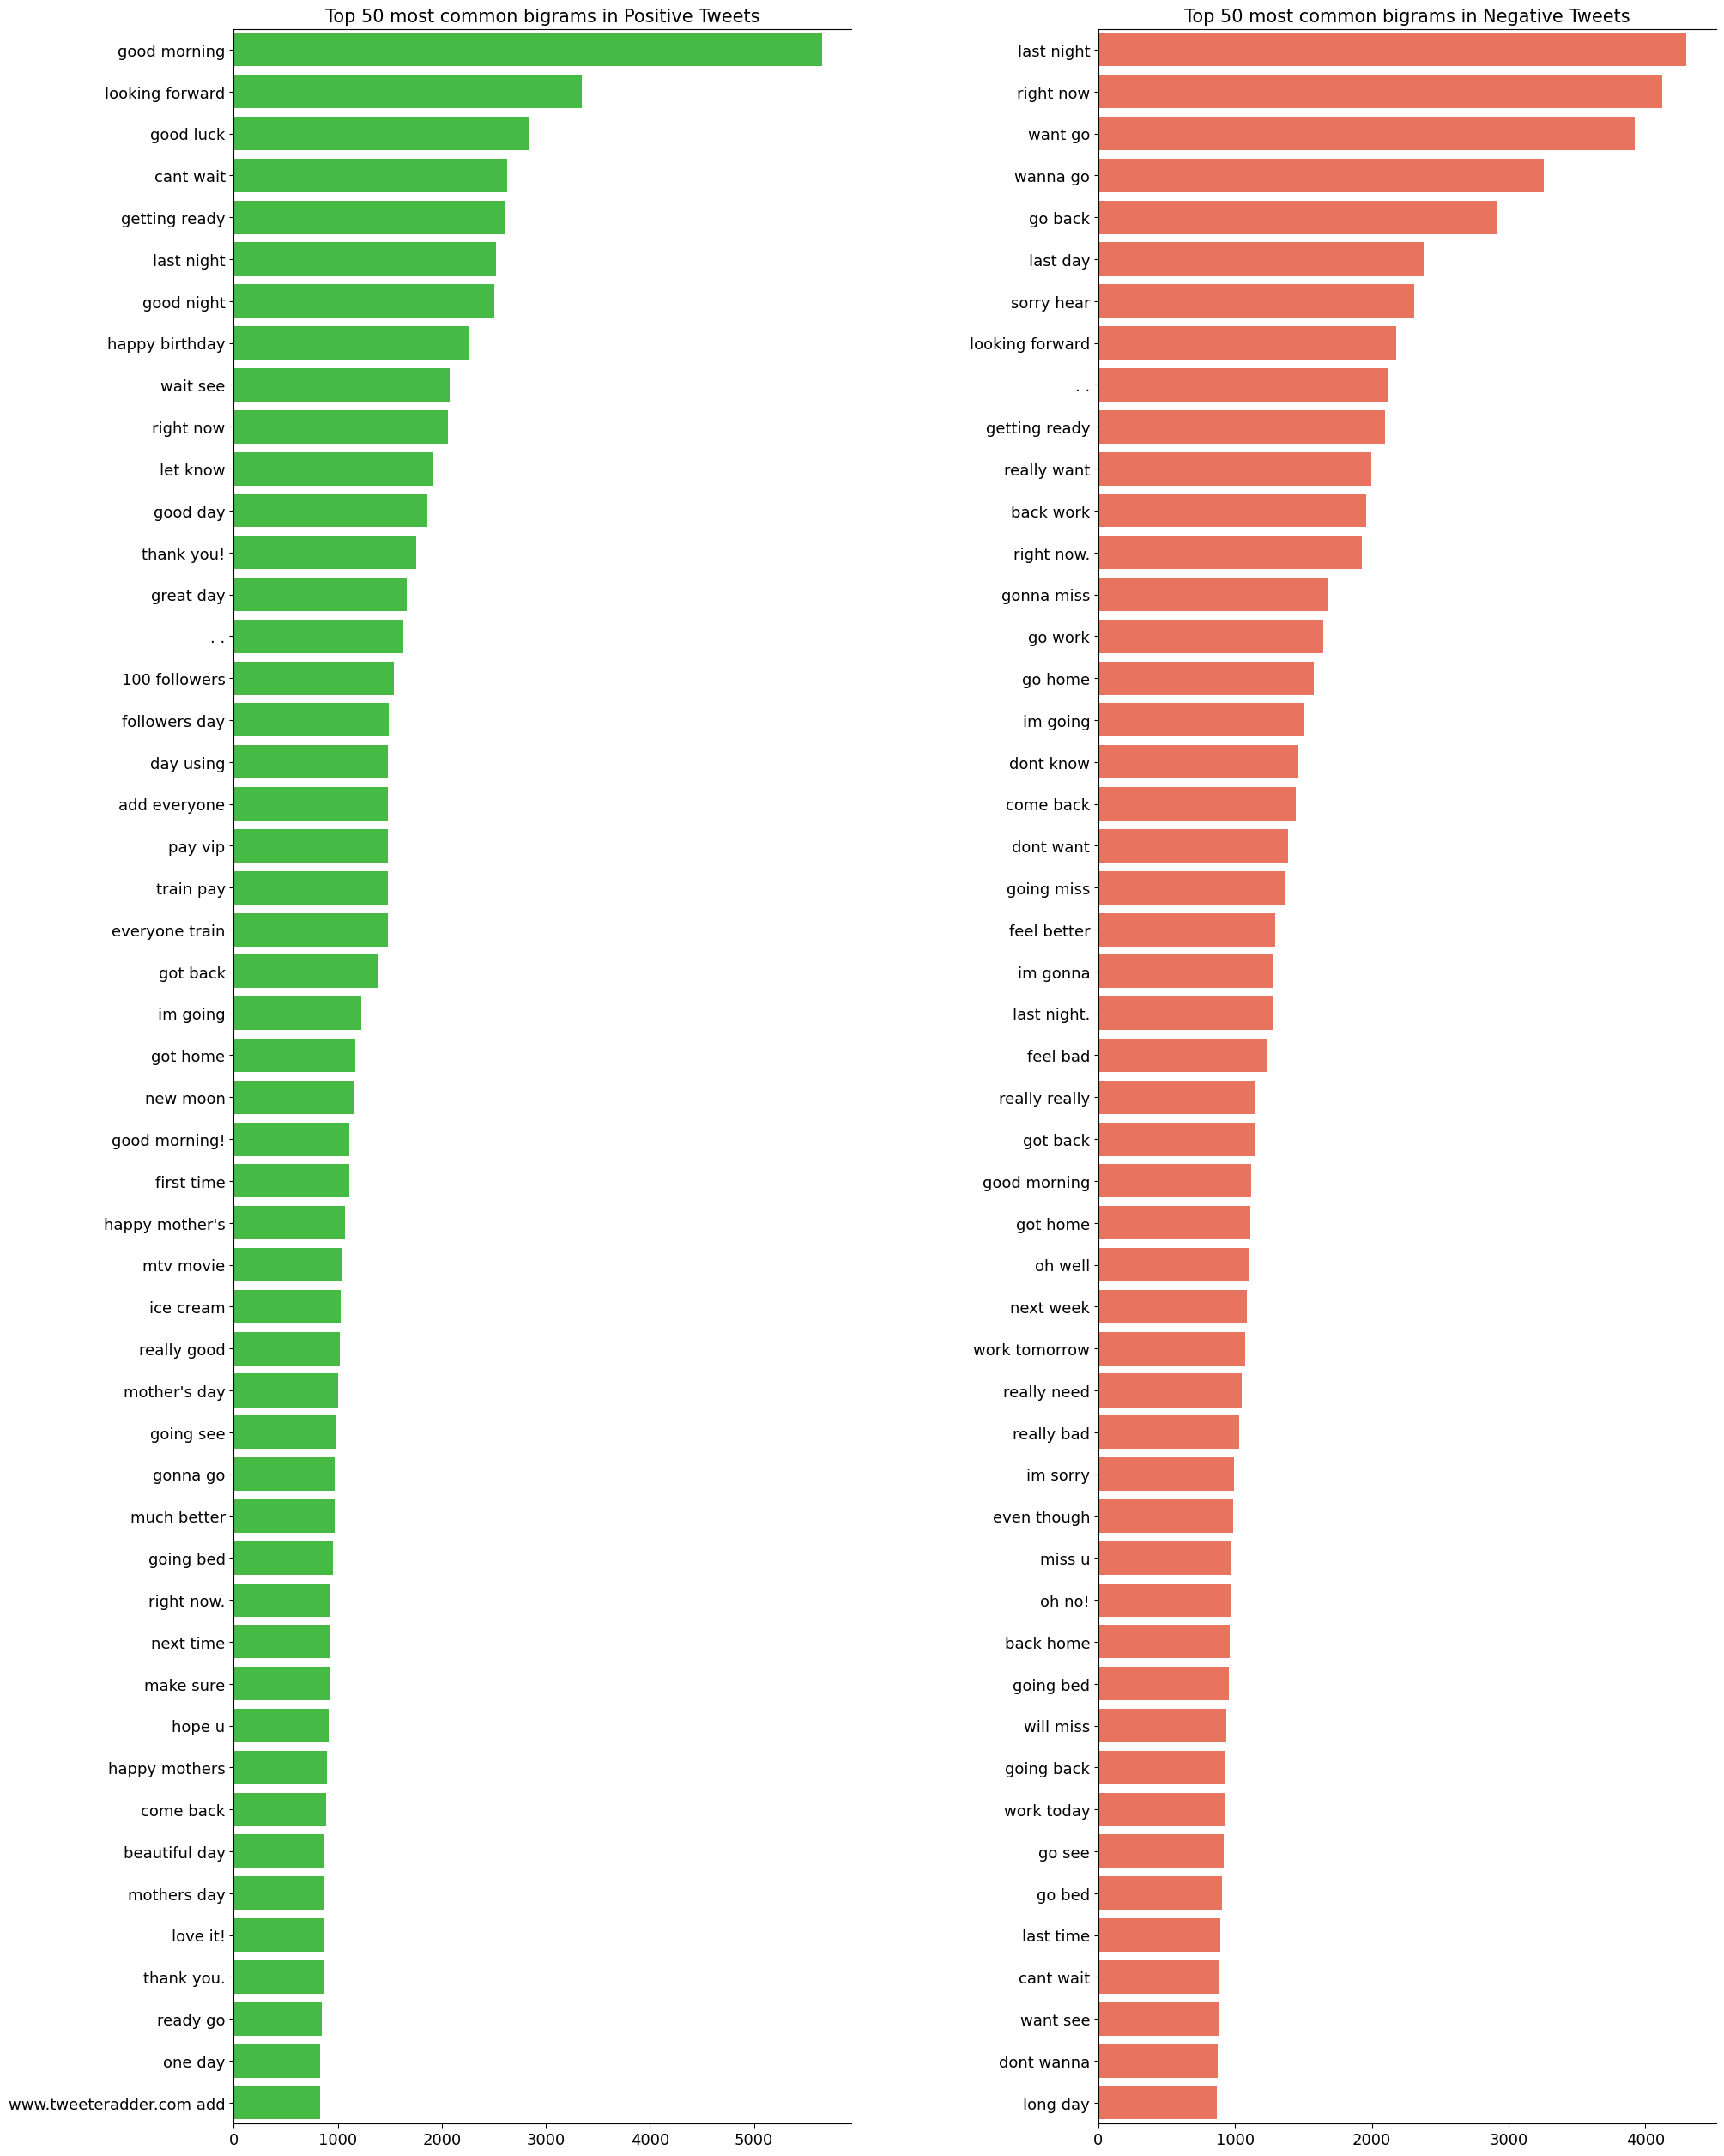

In [58]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 25), dpi=100)
plt.tight_layout()

sns.barplot(y=df_positive_bigrams[0].values[:N], x=df_positive_bigrams[1].values[:N], ax=axes[0], color='LimeGreen')
sns.barplot(y=df_negative_bigrams[0].values[:N], x=df_negative_bigrams[1].values[:N], ax=axes[1], color='tomato')

plt.subplots_adjust(wspace=0.4)

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in Positive Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in Negative Tweets', fontsize=15)

plt.show()

### Trigrams

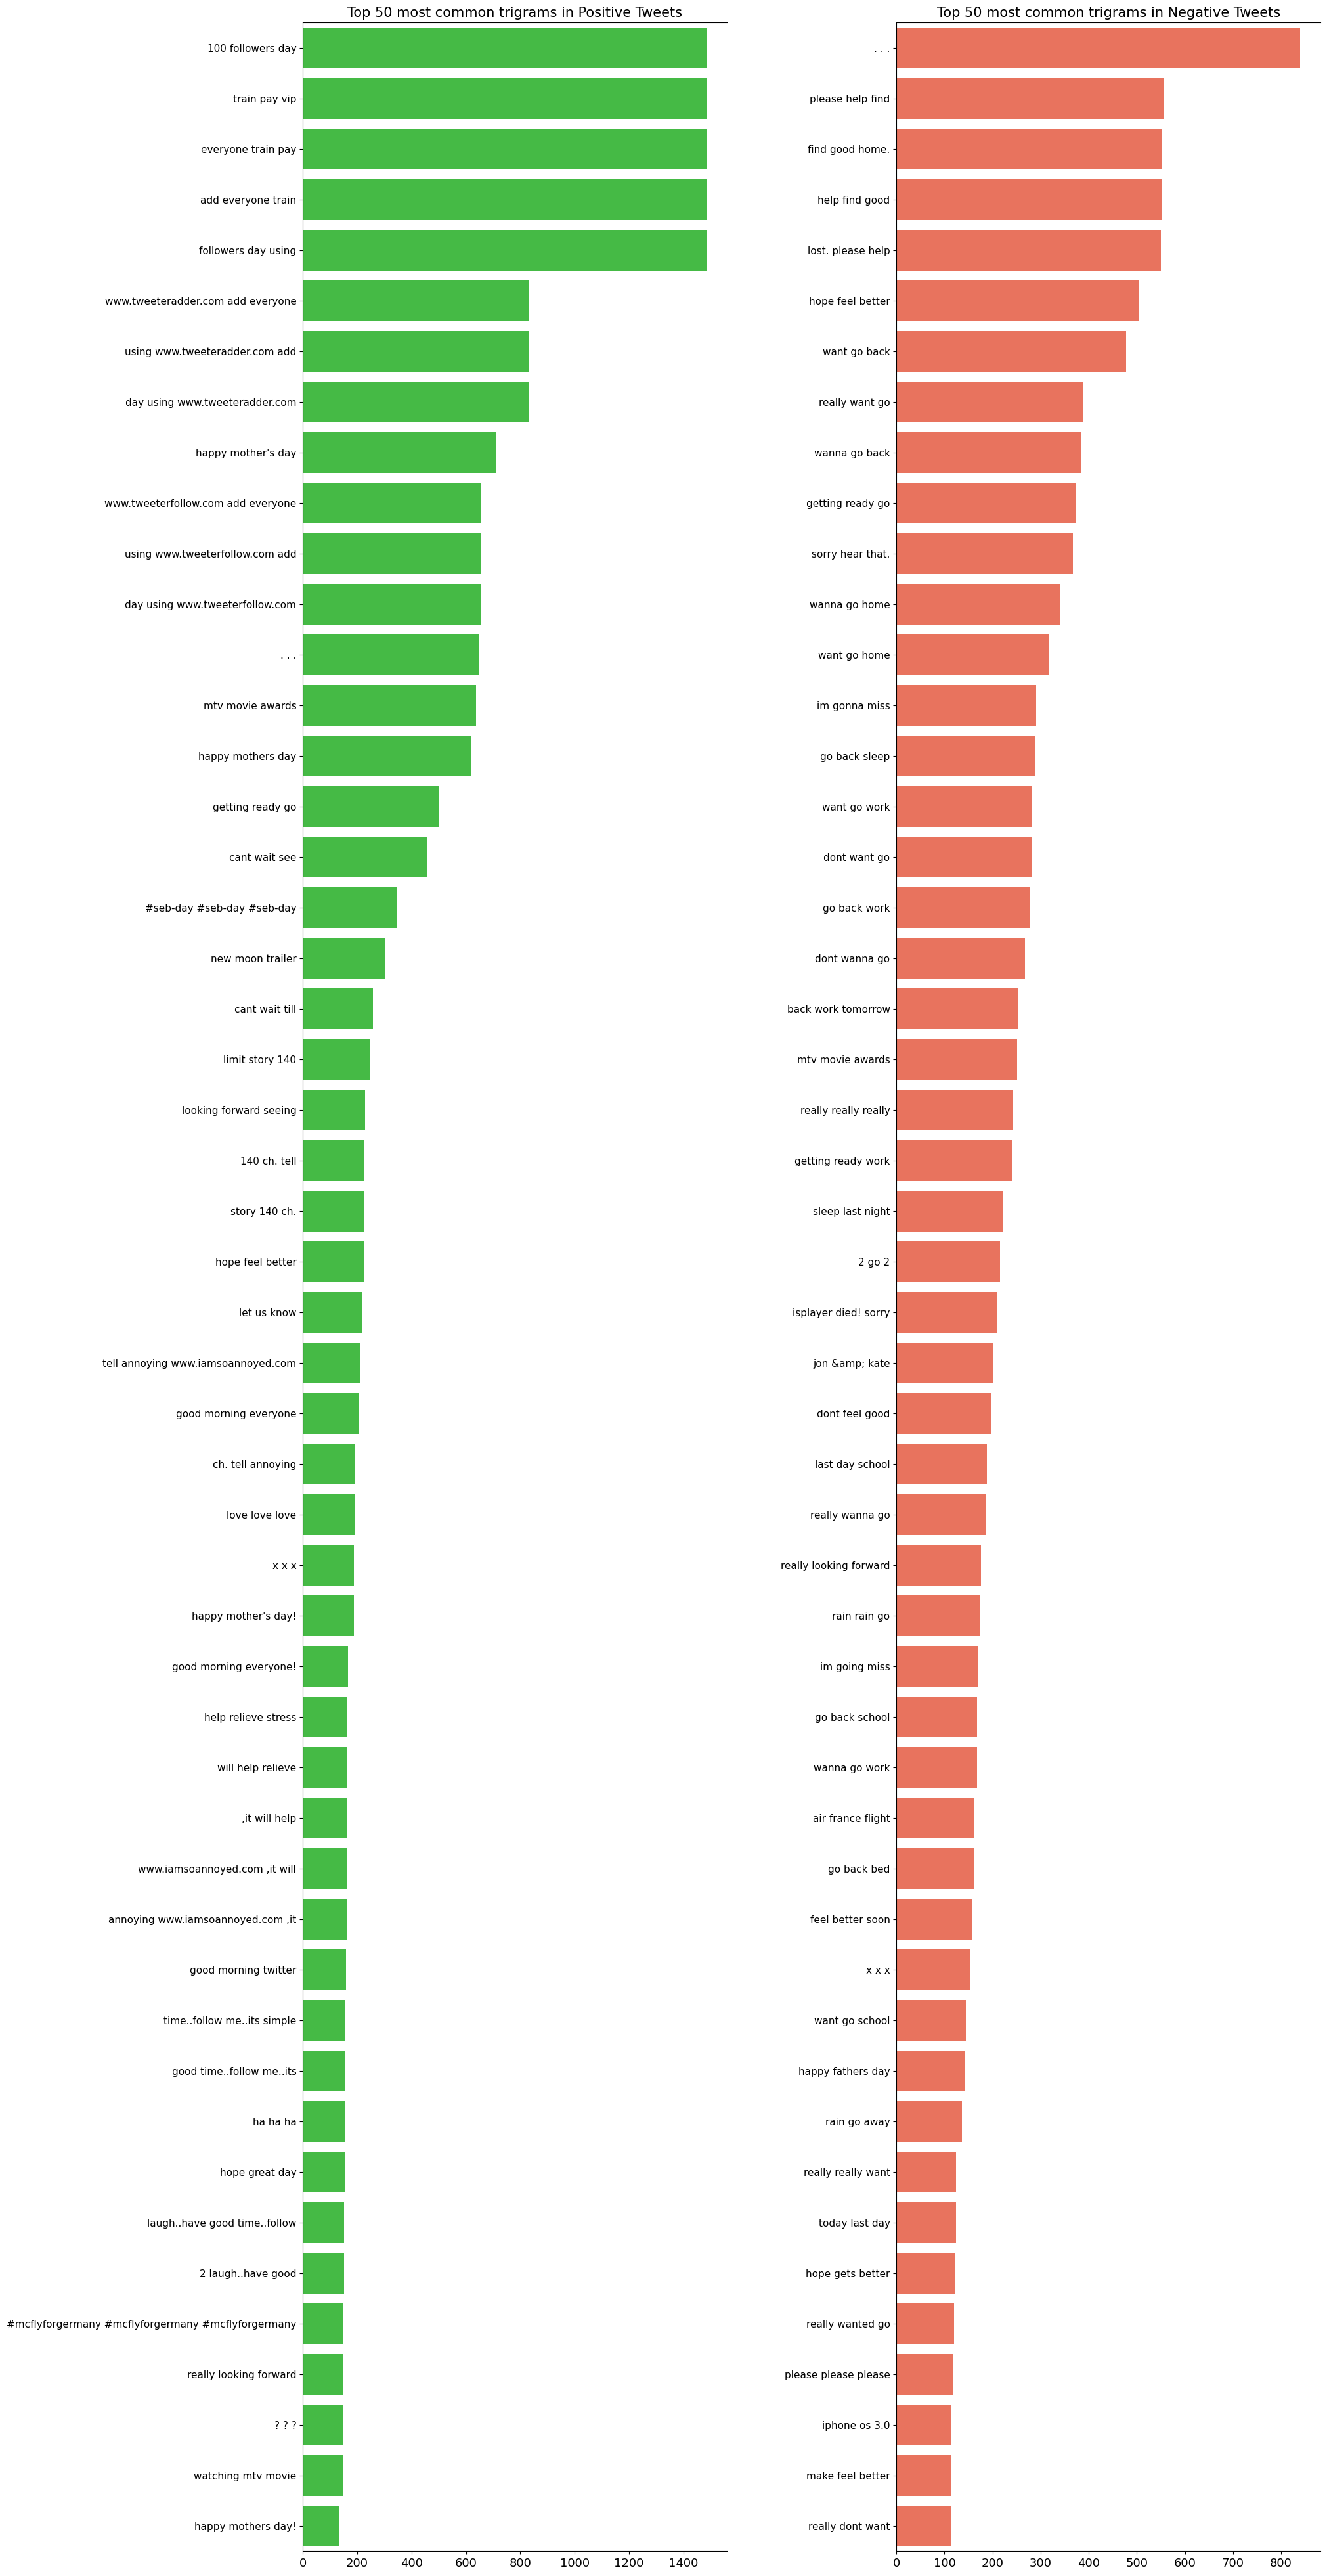

In [59]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 50), dpi=100)

sns.barplot(y=df_positive_trigrams[0].values[:N], x=df_positive_trigrams[1].values[:N], ax=axes[0], color='LimeGreen')
sns.barplot(y=df_negative_trigrams[0].values[:N], x=df_negative_trigrams[1].values[:N], ax=axes[1], color='tomato')

plt.subplots_adjust(wspace=0.4)

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=11)

axes[0].set_title(f'Top {N} most common trigrams in Positive Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common trigrams in Negative Tweets', fontsize=15)

plt.show()